In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("clean_dataset_forest_fire.csv")

In [3]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [5]:
df.drop(["day","month","year"],axis=1,inplace=True)

In [6]:
#Encoding
df["Classes"] = np.where(df["Classes"].str.contains("not fire"),0,1)

In [7]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [8]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [9]:
df.Classes.value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [10]:
## Independent Feature and dependent features
x= df.drop("FWI",axis=1)
y=df["FWI"]

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=42)

In [13]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((194, 11), (49, 11), (194,), (49,))

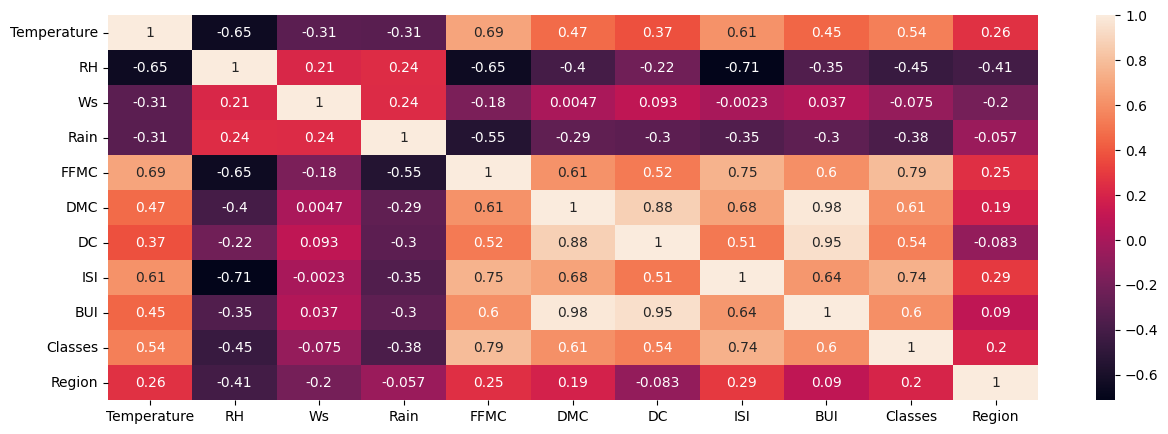

In [14]:
## Check for mutlicollinearity
plt.figure(figsize=(15,5))
corr = x_train.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [15]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix =  dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)

    return col_corr 

In [16]:
corr_features = correlation(x_train,0.85)

In [17]:
## drop features when  correlation is more than 0.85
x_train.drop(corr_features,axis=1,inplace=True)
x_test.drop(corr_features,axis=1,inplace=True)


In [18]:
x_train.shape,x_test.shape

((194, 9), (49, 9))

In [19]:
#Standardization
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

In [21]:
x_train_scale = scaler.fit_transform(x_train)
x_test_scale= scaler.transform(x_test)

Text(0.5, 1.0, 'x_train_scale')

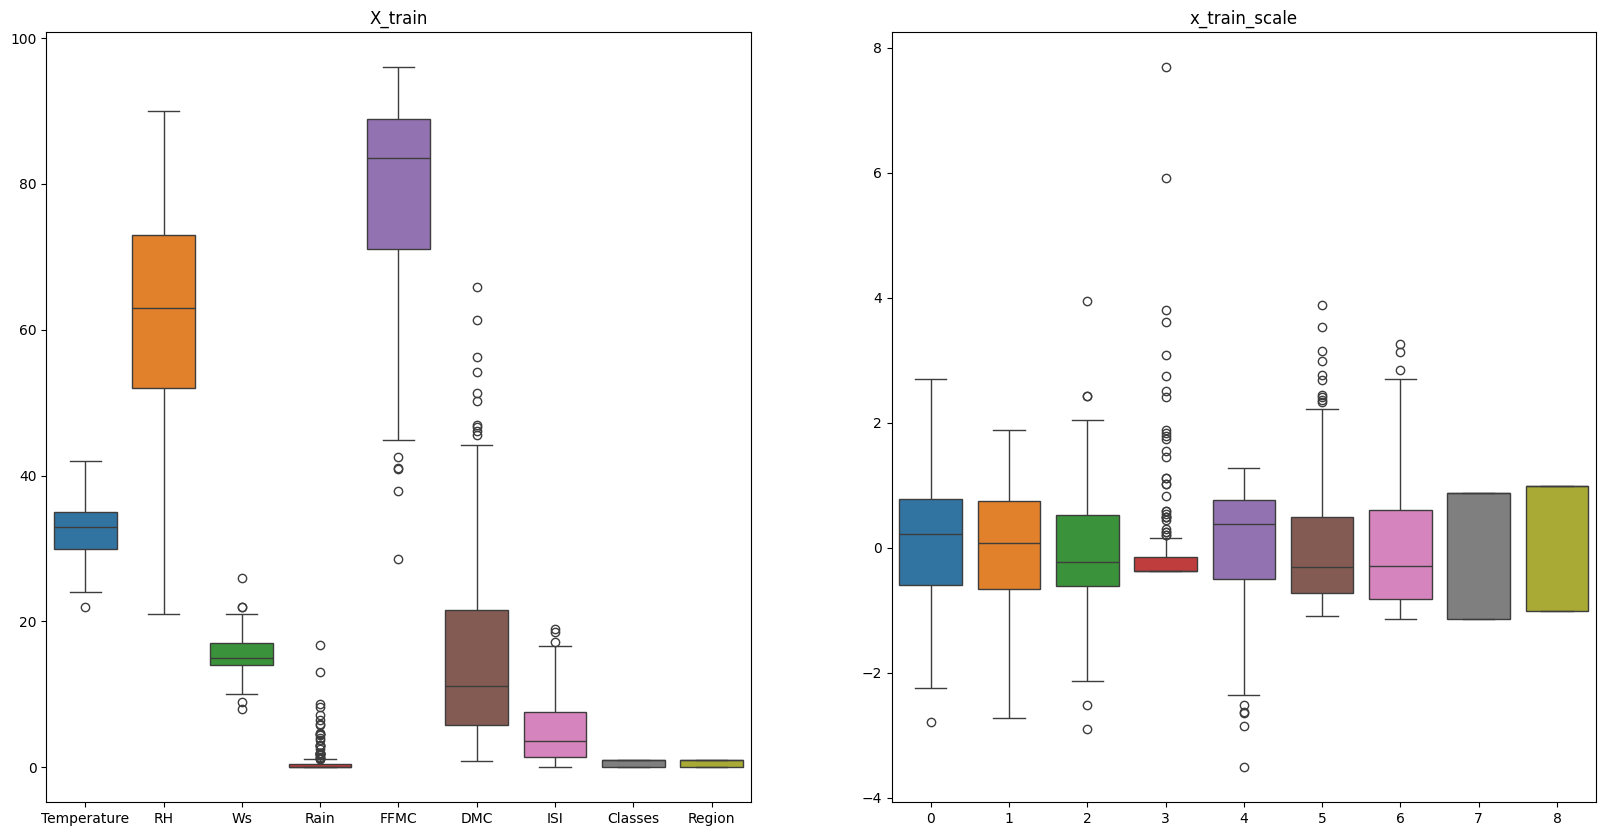

In [22]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.boxplot(data=x_train)
plt.title("X_train")
plt.subplot(1,2,2)
sns.boxplot(x_train_scale)
plt.title("x_train_scale")


# Linear Regression Model

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [24]:
linear_reg = LinearRegression()
linear_reg.fit(x_train_scale,y_train)

LinearRegression()

In [25]:
mean_squared_error(y_test,linear_reg.predict(x_test_scale))

np.float64(0.5882990110708654)

In [26]:
mean_absolute_error(y_test,linear_reg.predict(x_test_scale))

np.float64(0.5049978694165664)

In [27]:
r2_score(y_test,linear_reg.predict(x_test_scale))

0.9805895859259883

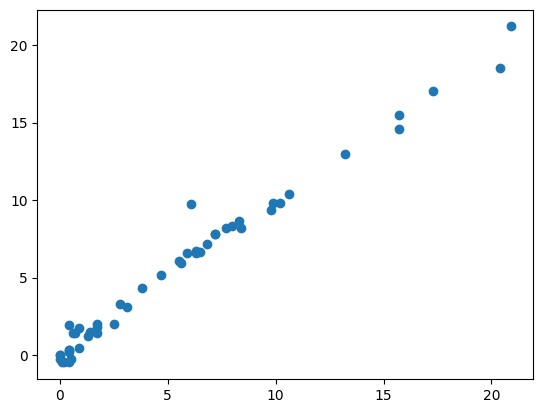

In [28]:
plt.scatter(y_test,linear_reg.predict(x_test_scale))

# Lasso Regression

In [29]:
from sklearn.linear_model import Lasso 

In [30]:
lasso = Lasso()

In [31]:
lasso.fit(x_train_scale,y_train)

Lasso()

In [32]:
mean_squared_error(y_test,lasso.predict(x_test_scale))

np.float64(1.7260423250231405)

In [33]:
r2_score(y_test,lasso.predict(x_test_scale))

0.9430507350726564

### Cross Validation lasso

In [34]:
from sklearn.linear_model import LassoCV

In [35]:
lassocv = LassoCV(cv=100)
lassocv.fit(x_train_scale,y_train)

LassoCV(cv=100)

In [36]:
r2_score(y_test,lassocv.predict(x_test_scale))

0.9800042925615902

In [37]:
mean_squared_error(y_test,lassocv.predict(x_test_scale))

np.float64(0.6060383290549572)

# Ridge Regression

In [38]:
from sklearn.linear_model import  Ridge

In [39]:
ridge = Ridge()

In [40]:
ridge.fit(x_train_scale,y_train)


Ridge()

In [41]:
mean_squared_error(y_test,ridge.predict(x_test_scale))

np.float64(0.6029616070548636)

In [42]:
r2_score(y_test,ridge.predict(x_test_scale))

0.9801058063273599

In [43]:
from sklearn.linear_model import  RidgeCV


In [44]:
ridgecv = RidgeCV(cv=100)

In [45]:
ridgecv.fit(x_train_scale,y_train)

e:\Code\venv\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
e:\Code\venv\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
e:\Code\venv\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
e:\Code\venv\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
e:\Code\venv\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
e:\Code\venv\Lib\site-pac

RidgeCV(cv=100)

In [46]:
r2_score(y_test,ridgecv.predict(x_test_scale))

0.9805468901305521

In [47]:
mean_squared_error(y_test,ridgecv.predict(x_test_scale))

np.float64(0.5895930532348415)

# Elasticnet Regression

In [48]:
from sklearn.linear_model import ElasticNet

In [49]:
enet = ElasticNet()

In [50]:
enet.fit(x_train_scale,y_train)


ElasticNet()

In [51]:
mean_squared_error(y_test,enet.predict(x_test_scale))

np.float64(4.009921298441001)

In [52]:
r2_score(y_test,enet.predict(x_test_scale))

0.8676961352267808

In [53]:
from sklearn.linear_model import ElasticNetCV

In [54]:
eNetCV = ElasticNetCV(cv=100)

In [55]:
eNetCV.fit(x_train_scale,y_train)

ElasticNetCV(cv=100)

In [56]:
r2_score(y_test,eNetCV.predict(x_test_scale))

0.9788421266988271

In [57]:
mean_squared_error(y_test,eNetCV.predict(x_test_scale))

np.float64(0.6412617418660854)

In [58]:
import pickle

In [59]:
pickle.dump(linear_reg,open("linear_model.pkl","wb"))
pickle.dump(scaler,open("scaler.pkl","wb"))